In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2021-01-12 19:00:49--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.1’

train_32x32.mat.1   100%[===================>] 173.61M  36.0MB/s    in 8.5s    

2021-01-12 19:00:58 (20.4 MB/s) - ‘train_32x32.mat.1’ saved [182040794/182040794]

--2021-01-12 19:00:58--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.1’

test_32x32.mat.1    100%[===================>]  61.30M  18.3MB/s    in 5.6s    

2021-01-12 19:01:04 (11.0 MB/s) - ‘test_32x32.mat.1’ saved [642

In [ ]:
import keras
from keras.layers.normalization import BatchNormalization
import numpy as np
import scipy.io as io
from keras.layers import Activation, Flatten,Softmax
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras import optimizers
from keras.backend import function
import pandas as pd

In [ ]:
#importing data
train_set = io.loadmat("train_32x32.mat")
test_set = io.loadmat("test_32x32.mat")
x_train = train_set['X']
y_train = train_set['y']
x_test = test_set['X']
y_test = test_set['y']
# Reshaping test and training data sets
x_train = np.moveaxis(x_train,[3,0,1,2],[0,1,2,3])
x_train = x_train.astype('float32')
x_test = np.moveaxis(x_test,[3,0,1,2],[0,1,2,3])
x_test = np.asarray(x_test)
x_test = x_test.astype('float32')
#Normalisation des données
x_train /= x_train.max()
x_test /= x_test.max()
# Passage de classe comme integer à classe comme vecteur de dimension classes
y_test_RN = [y-1 for y in y_test]# la classe 1 corresponds au array qui à 1 en indice 0
y_train_RN = [y-1 for y in y_train]
classes = 10
y_train_RN = keras.utils.to_categorical(y_train_RN, classes)
y_test_RN = keras.utils.to_categorical(y_test_RN, classes)
 #Définition du type de data pour optimiser la mémoire
y_train_RN = y_train_RN.astype('int32')
y_test_RN = y_test_RN.astype('int32')
# Featurewise normalization
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=False,
    zca_whitening=False, 
    zca_epsilon=1e-06)

datagen.fit(x_train)

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
def  DeepNet():
  model=Sequential()
  model.add(Conv2D(64, kernel_size=(8, 8),padding = 'same', activation='relu', input_shape=x_train.shape[1:]))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),  padding = 'valid', name='S1'))
  model.add(Conv2D(128, kernel_size=(6, 6), padding = 'valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),  padding = 'same', name='S2'))
  model.add(Conv2D(128, kernel_size=(5, 5),  strides = (1,1), padding = 'valid',  activation='relu'))
  model.add(Dropout(0.5)) 
  model.add(Flatten())
  model.add(Dense(classes, activation='softmax'))
  adam = optimizers.Adam(lr = 0.001)
  model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer= adam,
                  metrics=['accuracy'])
  return model
  model = DeepNet()

In [ ]:
model = Deepnet()
model_history = model.fit(x_train, y_train_RN, validation_split=0.2 ,epochs=10, batch_size=128)

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/Data')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        12352     
_________________________________________________________________
S1 (MaxPooling2D)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 128)       295040    
_________________________________________________________________
S2 (MaxPooling2D)            (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 128)         409728    
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [ ]:
scores=[]

In [ ]:
x_train_10000=x_train[:10000]

#Flatten()

In [ ]:
model.layers[6]

In [ ]:
get_flatten_output = function([model.layers[0].input],
                                  [model.layers[6].output])
layer_output = get_flatten_output([x_train_10000])


In [ ]:
df_flatten=pd.DataFrame(layer_output[0])

In [ ]:
df_flatten

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,0.000000,0.0,0.000000,0.0,0.966737,0.425759,0.0,0.076604,0.0,0.0,2.494935,0.788354,0.0,0.0,0.0,2.151472,0.0,0.0,0.0,0.865915,0.0,0.0,0.0,0.000000,0.0,0.000000,0.573485,0.0,0.000000,0.0,0.0,0.0,0.0,0.612216,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,1.315545,0.000000,0.0,0.0,0.000000,0.0,2.225031,0.0,0.000000,0.0,0.256458,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.084096,0.0,0.0,2.125423,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.158851,0.000000,0.000000,0.0,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,1.926997,0.0,0.000000,0.0,0.0,1.109826,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.896879,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.524440,0.000000,0.0,0.621219,0.0,0.0,0.000000,...,0.000000,0.452987,0.000000,0.000000,0.0,0.0,0.696908,0.0,0.099967,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.638044,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.768135,0.0,0.000000,0.0
2,0.289949,0.0,0.000000,0.0,0.000000,0.000000,0.0,3.448895,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.786438,0.0,0.0,0.0,0.0,0.000000,1.055599,0.0,0.000000,0.0,0.0,1.633360,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.788132,0.0,0.0,0.000000,0.0,0.142989,0.000000,0.0,0.0,0.117514,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.000000,0.0,1.642749,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,7.708865,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,4.626571,0.000000,0.000000,0.0,0.0,0.662987,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.656040,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.082746,0.0,0.0,0.000000,0.537450,0.0,0.0,0.0,0.453122,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.041832,1.061831,0.0,0.000000,0.0,0.0,0.230226,...,0.137308,0.000000,1.621578,0.000000,0.0,0.0,0.000000,0.0,0.203523,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.927589,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.109447,0.216631,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.186613,0.401592,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.0,0.000000,0.0,1.165077,0.318782,0.0,0.014378,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.237310,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.232413,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,1.102222,0.0,0.0,0.182073,0.0,0.983728,0.0,0.000000,0.0,0.622445,0.0,0.0,0.0,0.606954,0.000000,0.0,0.0,1.565482,0.0,0.000000,1.406511,0.0,0.0,0.638523,0.000000,0.0,0.406053,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.424895,0.0
9996,0.000000,0.0,1.898456,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2.884669,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.504732,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2.306773,0.000000,0.0,2.696697,0.0,0.0,0.000000,...,0.429800,0.759837,1.751628,0.000000,0.0,0.0,0.311468,0.0,0.944614,0.0,0.00

In [ ]:
y_test_KNN=[k.item() for k in y_test]
y_train_KNN=[k.item() for k in y_train]

In [ ]:
len(y_train_KNN)

73257

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(layer_output[0][:10000],y_train_KNN[:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
layer_output_test=layer_output = get_flatten_output(x_test[:5000])

In [ ]:
s=knn.score(layer_output_test[0][:5000],y_test_KNN[:5000])
scores.append(s)


#Conv 2D 14

In [ ]:
model.layers[4]

In [ ]:
get_conv14_output = function([model.layers[0].input],
                                  [model.layers[6].output])
layer_output_conv14 = get_conv14_output([x_train_10000])


In [ ]:
len(layer_output_conv14[0][1])

512

In [ ]:
knn4=KNeighborsClassifier()
knn4.fit(layer_output_conv14[0][:10000],y_train_KNN[:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
layer_output_test_conv14= get_conv14_output(x_test[:5000])

In [ ]:
s=knn4.score(layer_output_test_conv14[0][:5000],y_test_KNN[:5000])
scores.append(s)

# Maxpooling  S2

In [ ]:
model.layers[3]

In [ ]:
get_S2_output = function([model.layers[0].input],
                                  [model.layers[3].output])
layer_output_S2 = get_S2_output([x_train_10000])

In [ ]:
len(layer_output_S2[0][1])

6

In [ ]:
layer_output_S2[0]

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.56220806],
         [0.        , 0.4490571 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.3447091 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.82163864, 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.51349425],
         [0.12066446, 0.38066238, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.      

In [ ]:
np_array=np.asarray(layer_output_S2[0])
reshaped_array = np_array.reshape(10000,4608)

In [ ]:
len(reshaped_array[1])

4608

In [ ]:
knn3=KNeighborsClassifier()
knn3.fit(reshaped_array,y_train_KNN[:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
layer_output_test_S2= get_S2_output(x_test[:5000])

In [ ]:
np_array=np.asarray(layer_output_test_S2[0])
reshaped_array_test = np_array.reshape(5000,4608)

In [ ]:
s=knn3.score(reshaped_array_test,y_test_KNN[:5000])
scores.append(s)

#Conv 2D 13

In [ ]:
model.layers[2]

In [ ]:
get_13_output = function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output_13 = get_13_output([x_train_10000])

In [ ]:
len(layer_output_13[0][0][0][0])

128

In [ ]:
np_array_3=np.asarray(layer_output_13[0])
reshaped_array_3 = np_array_3.reshape(10000,15488)

In [ ]:
knn2=KNeighborsClassifier()
knn2.fit(reshaped_array_3,y_train_KNN[:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
layer_output_test_13= get_13_output(x_test[:5000])

In [ ]:
np_array=np.asarray(layer_output_test_13[0])
reshaped_array_test_13 = np_array.reshape(5000,15488)

In [ ]:
s=knn2.score(reshaped_array_test_13,y_test_KNN[:5000])
scores.append(s)

In [ ]:
scores

[0.893, 0.893, 0.7718, 0.7256]

# maxpooling S1

In [ ]:
model.layers[1]

In [ ]:
get_output_1=function([model.layers[0].input],
                                  [model.layers[1].output])
output_1=get_output_1([x_train_10000])

In [ ]:
np_array_1=np.asarray(output_1[0])
reshaped_array_1 = np_array_1.reshape(10000,16384)

In [ ]:
knn1=KNeighborsClassifier()
knn1.fit(reshaped_array_1,y_train_KNN[:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
layer_output_test_1= get_output_1(x_test[:5000])

In [ ]:
np_array_test_1=np.asarray(layer_output_test_1[0])
reshaped_array_test_1 = np_array_test_1.reshape(5000,16384)

In [ ]:
s=knn1.score(reshaped_array_test_1,y_test_KNN[:5000])
scores.append(s)

In [ ]:
scores

[0.893, 0.893, 0.7718, 0.7256, 0.5388]

# Conv 2D 12

Pour des raisons de ram on ne peut pas avoir la sortie de cette couche pour notre échantillon de 10000 exemples.

#Données brutes

In [ ]:
scores=[0.893, 0.893, 0.7718, 0.7256, 0.5388]

In [ ]:
x_train_10000.shape

(10000, 32, 32, 3)

In [ ]:
données_brutes=np.array(x_train_10000)
données_brutes_vectorisées=données_brutes.reshape(10000,3072)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_brutes=KNeighborsClassifier()
knn_brutes.fit(données_brutes_vectorisées,y_train_KNN[:10000])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
données_brutes_test=np.array(x_test[:5000])
données_brutes_vectorisées_test=données_brutes_test.reshape(5000,3072)

In [ ]:
s=knn_brutes.score(données_brutes_vectorisées_test,y_test_KNN[:5000])
scores.append(s)

In [ ]:
scores=scores[::-1]

In [ ]:
couches=[0,2,3,4,5,6]

In [ ]:
labels=['Brutes','Maxpooling1','C.Convolution2','Maxpooling2','C.Convolution3','Flatten']

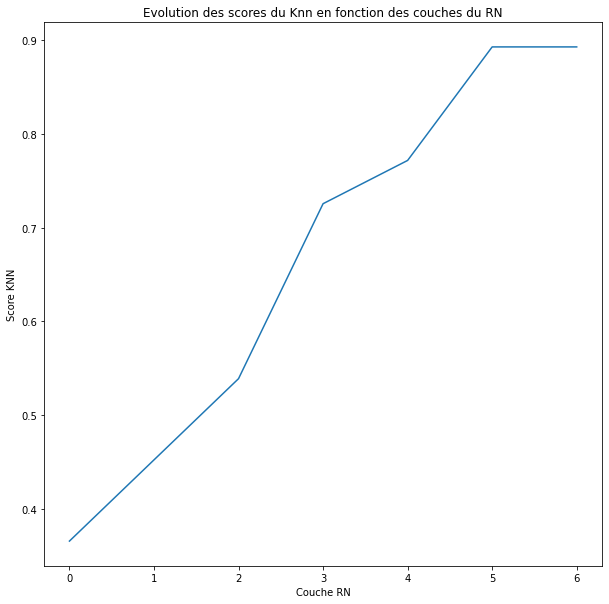

In [ ]:
import matplotlib.pyplot as plt 
figure=plt.figure(figsize=(10,10))
plt.plot(couches,scores)
plt.title('Evolution des scores du Knn en fonction des couches du RN')
plt.xlabel('Couche RN')
plt.ylabel('Score KNN')
plt.show()